In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
prosp_pib = pd.read_csv('../BDD/perspective-pib-ocde.csv', sep=';')
prosp_pop = pd.read_csv('../BDD/population-perspective-UNO.csv', sep=';')

In [11]:
ch_table = pd.merge(prosp_pop, prosp_pib, left_on =['Time'], right_on=['TIME'])
ch_table = ch_table[ch_table.Location == "China" ]
ch_table = ch_table[ch_table.LOCATION=='CHN']
ch_table.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value
3658,156,China,2,Medium,2016,2016.5,726052.413,687996.940,1414049.353,150.620,CHN,GDPLTFORECAST,TOT,MLN_USD,A,2016,19446705.92
27031,156,China,2,Medium,2017,2017.5,729462.380,691559.414,1421021.794,151.362,CHN,GDPLTFORECAST,TOT,MLN_USD,A,2017,20788528.63
50404,156,China,2,Medium,2018,2018.5,732677.783,694970.006,1427647.789,152.068,CHN,GDPLTFORECAST,TOT,MLN_USD,A,2018,22173019.96
73777,156,China,2,Medium,2019,2019.5,735624.259,698159.433,1433783.692,152.722,CHN,GDPLTFORECAST,TOT,MLN_USD,A,2019,23601365.67
129000,156,China,2,Medium,2020,2020.5,738247.340,701076.434,1439323.774,153.312,CHN,GDPLTFORECAST,TOT,MLN_USD,A,2020,24896400.00


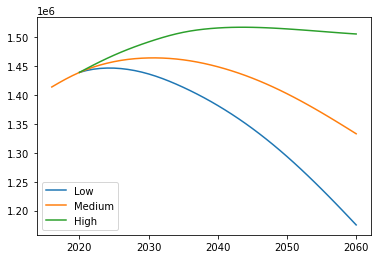

In [12]:
low= ch_table[ch_table.Variant=="Low"]
medium= ch_table[ch_table.Variant=="Medium"]
high= ch_table[ch_table.Variant=="High"]
plt.plot(low['Time'],low['PopTotal'], label='Low')
plt.plot(medium['Time'],medium['PopTotal'], label='Medium')
plt.plot(high['Time'],high['PopTotal'], label='High')
plt.legend()

Text(0.5, 1.0, 'GDP per capita projections (UNO)')

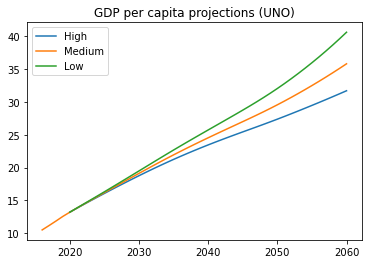

In [13]:
gdpc_m = (medium['Value']/medium['PopTotal'])*(10.26168/13.453050)
gdpc_l = (low['Value']/low['PopTotal'])*(10.26168/13.453050)
gdpc_h = (high['Value']/high['PopTotal'])*(10.26168/13.453050)
plt.plot(low['Time'],gdpc_h, label='High')
plt.plot(medium['Time'],gdpc_m, label='Medium')
plt.plot(high['Time'],gdpc_l, label='Low')
plt.legend()
plt.title("GDP per capita projections (UNO)")

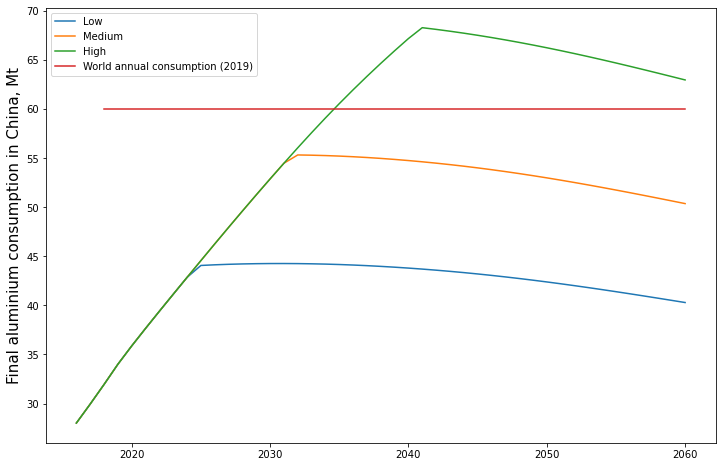

In [16]:
import metalsprospective as mp
plt.figure(figsize=(12,8))
plt.plot(medium['Time'], mp.fADC(gdpc_m, 17/9, -15/26,16,36)*medium['PopTotal']/10**6, label= "Low")
plt.plot(medium['Time'], mp.fADC(gdpc_m,17/9, -15/26, 20,40)*medium['PopTotal']/10**6, label= "Medium")
plt.plot(medium['Time'], mp.fADC(gdpc_m, 17/9, -15/26,25 ,45)*medium['PopTotal']/10**6, label= "High")
plt.plot([2018,2060], [6*10**1, 6*10**1], label="World annual consumption (2019)")
plt.ylabel("Final aluminium consumption in China, Mt", fontsize=15)
plt.legend()

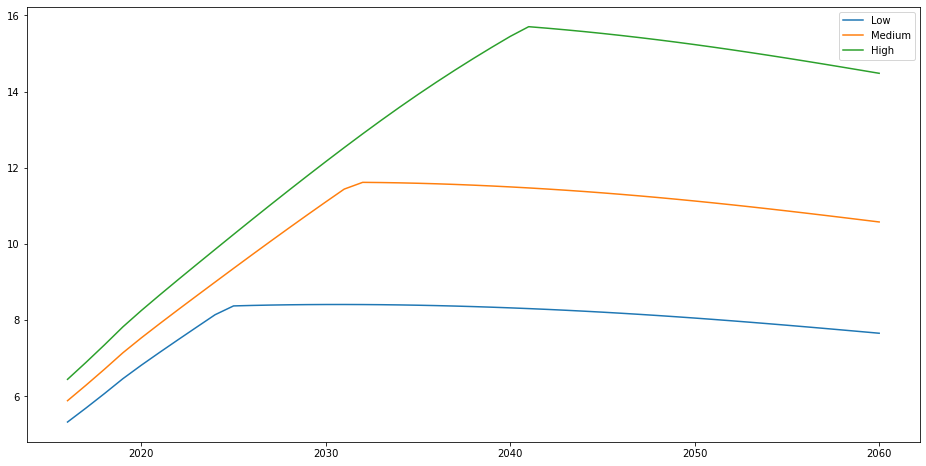

In [15]:

plt.figure(figsize=(16,8))
plt.plot(medium['Time'], mp.fADC(gdpc_m, 17/9, -15/26,16,36)*medium['PopTotal']*190*10**-9, label= "Low")
plt.plot(medium['Time'], mp.fADC(gdpc_m,17/9, -15/26, 20,40)*medium['PopTotal']*210*10**-9, label= "Medium")
plt.plot(medium['Time'], mp.fADC(gdpc_m, 17/9, -15/26,25 ,45)*medium['PopTotal']*230*10**-9, label= "High")
plt.legend()

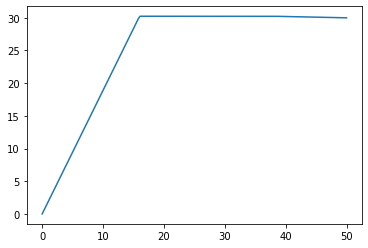

In [8]:
plt.plot(np.linspace(0,50, 200), mp.fADC(np.linspace(0,50, 200),  17/9,-0.02,16,38))

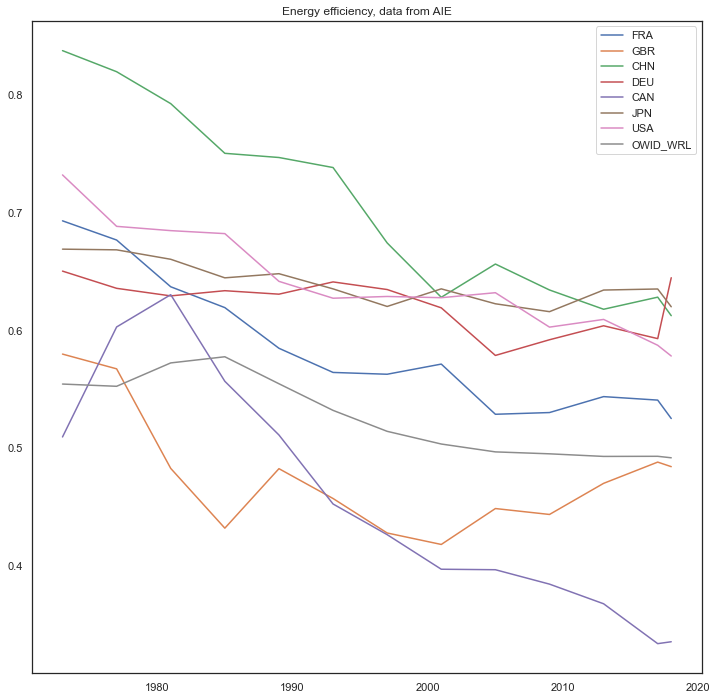

In [16]:
def energy_efficiency(countries = ['FRA', 'GBR', 'CHN', 'DEU', 'CAN', 'JPN',  'USA', 'OWID_WRL' ]) :

    sns.set_theme(style='white')
    energy = pd.read_csv('../BDD/energy-final.csv', sep=';')

    plt.figure(figsize=(12,12))
    for code in countries : 
        tab =energy[energy.Code==code].sort_values(by = 'Year')
       
        year = tab['Year']
        primary = np.array(tab['Primary (pJ)'])
        final = np.array(tab['Final energy (pJ)'])
        

        plt.plot(year, final/primary, label = code)
        plt.legend()
        plt.title("Energy efficiency, data from AIE")

    return None
energy_efficiency()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


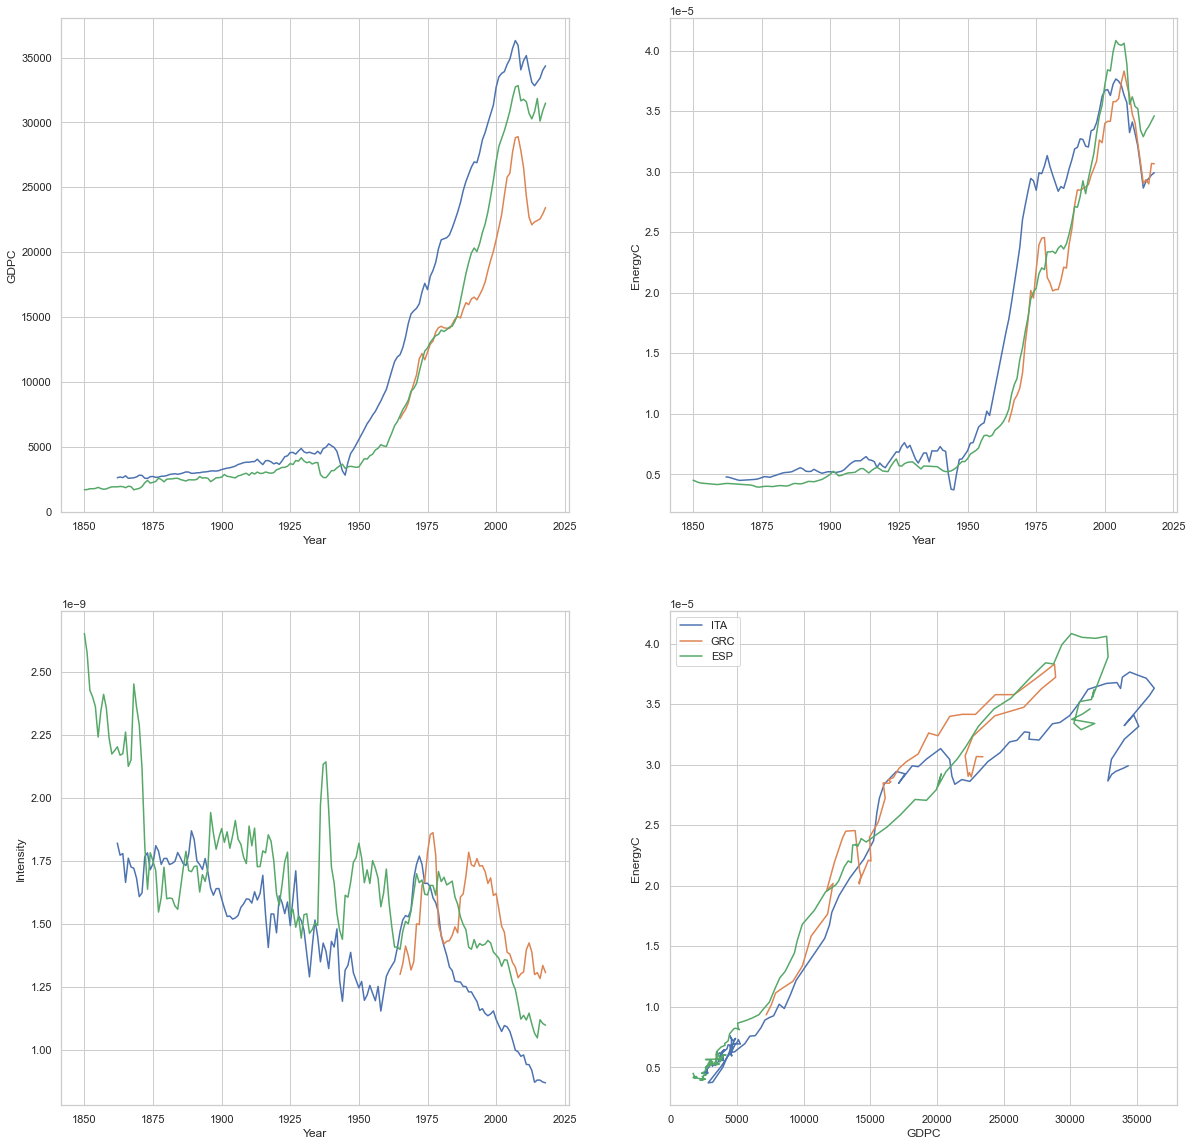

In [17]:
import data_visualization as dv
dv.comparative_plot_bis(countries= ['ITA', 'GRC', 'ESP'], x_data=['Year', 'Year', 'Year', 'GDPC'], y_data=['GDPC', 'EnergyC', 'Intensity', 'EnergyC' ])


(0.0, 8.25)

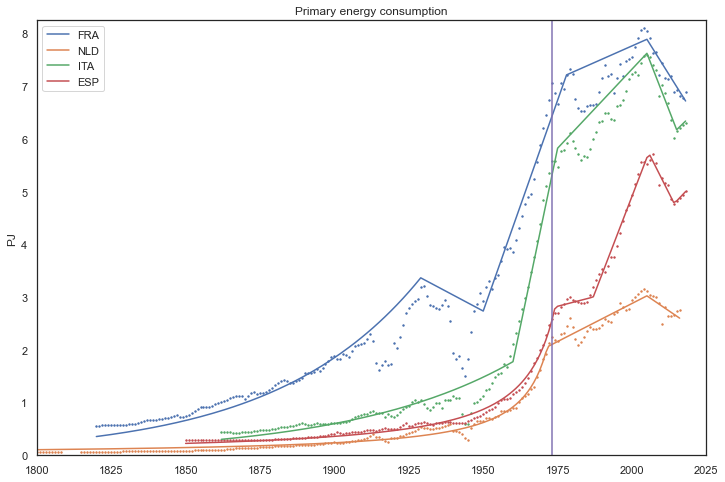

In [19]:
sns.set_theme(style='white')
FRA = pd.read_csv('../BDD/final_tables/FRA.csv')
NLD = pd.read_csv('../BDD/final_tables/NLD.csv')
ITA= pd.read_csv('../BDD/final_tables/ITA.csv')
JPN= pd.read_csv('../BDD/final_tables/JPN.csv')
GBR = pd.read_csv('../BDD/final_tables/GBR.csv')
ESP = pd.read_csv('../BDD/final_tables/ESP.csv')
plt.figure(figsize=(12,8))
plt.scatter(FRA['Year'], FRA['Primary energy (PJ)']/1000, s=2)
plt.plot(FRA['Year'], FRA['Energy(PJ)-Time(Year)']/1000, label='FRA')
plt.scatter(NLD['Year'], NLD['Primary energy (PJ)']/1000, s=2)
plt.plot(NLD['Year'], NLD['Energy(PJ)-Time(Year)']/1000, label='NLD')
plt.scatter(ITA['Year'], ITA['Primary energy (PJ)']/1000, s=2)
plt.plot(ITA['Year'], ITA['Energy(PJ)-Time(Year)']/1000, label='ITA')
plt.scatter(ESP['Year'], ESP['Primary energy (PJ)']/1000, s=2)
plt.plot(ESP['Year'], ESP['Energy(PJ)-Time(Year)']/1000, label='ESP')
plt.legend()
plt.ylabel('PJ')
plt.title('Primary energy consumption')
plt.plot([1973,1973],[0,8.250])
plt.xlim(1800,2025)
plt.ylim(0, 8.250)

In [12]:
FRA.head()

,Year,GDP per capita,Entity,Code,Population,Primary energy (PJ),Primary energy (TWh),Energy(PJ)-Time(Year),GDP(2011$)-Time(year),Energy(PJ)-GDP(10e12$),EI(PJ/$)-Time(year)
0,1820,1809.0,France,FRA,31549988,560.619,149.153036,355.825848,7.769431e+10,0.005144,9.438880e-09
1,1821,1953.0,France,FRA,31700048,564.377,150.152854,363.238036,7.817200e+10,0.005664,9.401040e-09
2,1822,1875.0,France,FRA,31853160,568.135,151.152673,370.804628,7.865561e+10,0.005429,9.363200e-09
3,1823,1934.0,France,FRA,32007456,571.892,152.152225,378.528839,7.914523e+10,0.005663,9.325360e-09
4,1824,1986.0,France,FRA,32163920,575.488,153.108943,386.413953,7.964099e+10,0.005874,9.287521e-09


Text(0, 0.5, 'Primary energy consumption, EJ')

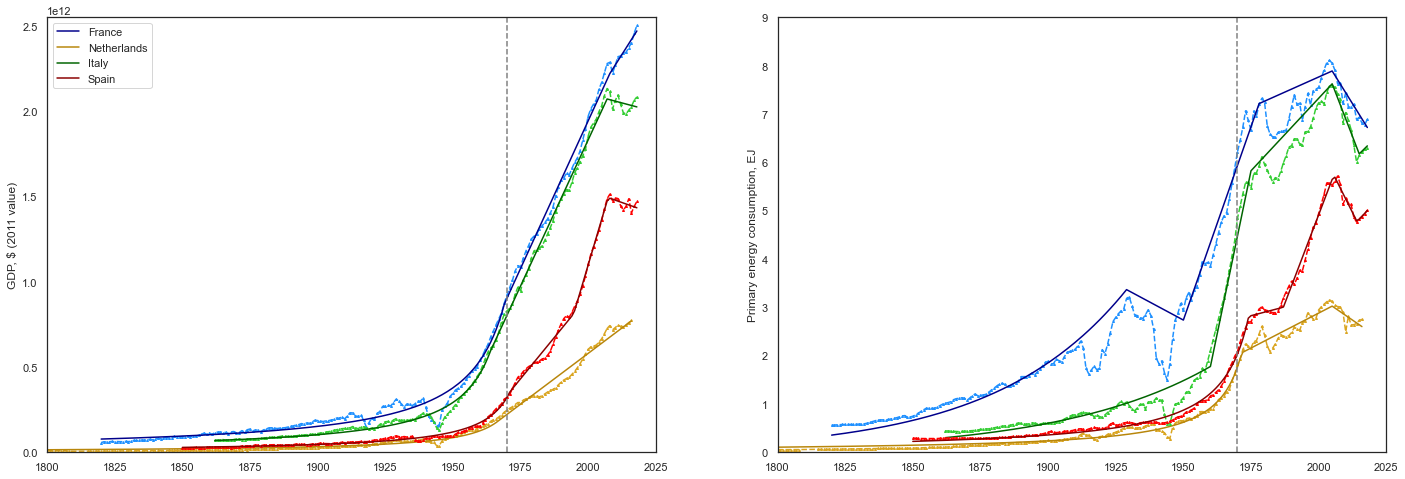

In [42]:
plt.figure(figsize=(24,8))
colors = ['dodgerblue', 'goldenrod', 'limegreen', 'red']
colors_d = ['darkblue', 'darkgoldenrod', 'darkgreen', 'darkred']
countries = [FRA, NLD, ITA, ESP]
colors = ['dodgerblue', 'goldenrod', 'limegreen', 'red', 'chocolate', 'blueviolet']
colors_d = ['darkblue', 'darkgoldenrod', 'darkgreen', 'darkred', 'saddlebrown', 'indigo']
plt.subplot(121)
for i in range(len(countries)) : 

    country=countries[i]
    plt.plot(country['Year'], country['GDP per capita']*country['Population'],linestyle='dashed', marker='^', markersize=2,color=colors[i])
    plt.plot(country['Year'], country['GDP(2011$)-Time(year)'],   color=colors_d[i] , label  =country['Entity'][0])

plt.ylabel('GDP, $ (2011 value)')
plt.legend()
plt.plot([1970,1970],[0,2.55*10**12], linestyle='dashed', color='grey')
plt.xlim(1800,2025)
plt.ylim(0, 2.55*10**12)
plt.subplot(122)
for i in range(len(countries)) : 
    country=countries[i]
    plt.plot(country['Year'], country['Primary energy (PJ)']/1000 ,linestyle='dashed', marker='^', markersize=2,color=colors[i])
    plt.plot(country['Year'], country['Energy(PJ)-Time(Year)']/1000, color=colors_d[i] , label  =country['Entity'][0])

plt.plot([1970,1970],[0,9], linestyle='dashed', color='grey')
plt.ylim(0,9)
plt.xlim(1800,2025)
plt.ylabel('Primary energy consumption, EJ')

Text(0, 0.5, 'Primary energy consumption, EJ')

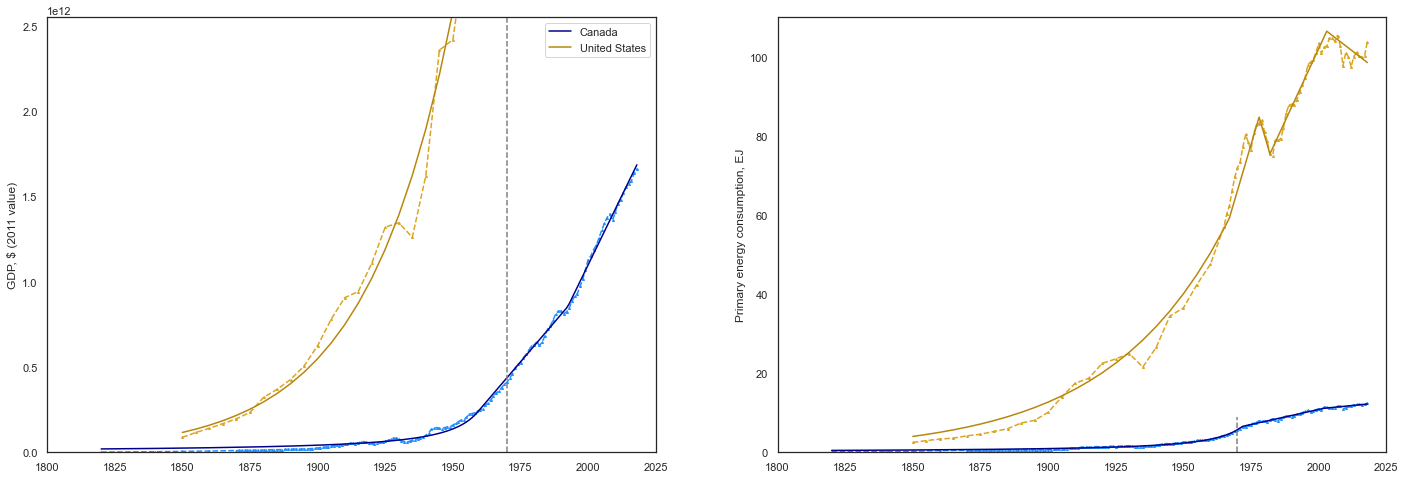

In [51]:
plt.figure(figsize=(24,8))
colors = ['dodgerblue', 'goldenrod', 'limegreen', 'red']
colors_d = ['darkblue', 'darkgoldenrod', 'darkgreen', 'darkred']

CAN = pd.read_csv('../BDD/final_tables/CAN.csv')
USA = pd.read_csv('../BDD/final_tables/USA.csv')
countries = [CAN, USA]

colors = ['dodgerblue', 'goldenrod', 'limegreen', 'red', 'chocolate', 'blueviolet']
colors_d = ['darkblue', 'darkgoldenrod', 'darkgreen', 'darkred', 'saddlebrown', 'indigo']
plt.subplot(121)
for i in range(len(countries)) : 

    country=countries[i]
    plt.plot(country['Year'], country['GDP per capita']*country['Population'],linestyle='dashed', marker='^', markersize=2,color=colors[i])
    plt.plot(country['Year'], country['GDP(2011$)-Time(year)'],   color=colors_d[i] , label  =country['Entity'][0])

plt.ylabel('GDP, $ (2011 value)')
plt.legend()
plt.plot([1970,1970],[0,2.55*10**12], linestyle='dashed', color='grey')
plt.xlim(1800,2025)
plt.ylim(0, 2.55*10**12)
plt.subplot(122)
for i in range(len(countries)) : 
    country=countries[i]
    plt.plot(country['Year'], country['Primary energy (PJ)']/1000 ,linestyle='dashed', marker='^', markersize=2,color=colors[i])
    plt.plot(country['Year'], country['Energy(PJ)-Time(Year)']/1000, color=colors_d[i] , label  =country['Entity'][0])

plt.plot([1970,1970],[0,9], linestyle='dashed', color='grey')
plt.ylim(0,110)
plt.xlim(1800,2025)
plt.ylabel('Primary energy consumption, EJ')

In [45]:
CAN.columns

Index(['Year', 'GDP per capita', 'Entity', 'Code', 'Population',
       'Primary energy (PJ)', 'Primary energy (TWh)', 'Energy(PJ)-Time(Year)',
       'Energy(PJ)-GDP(10e12$)', 'EI(PJ/$)-Time(year)'],
      dtype='object')

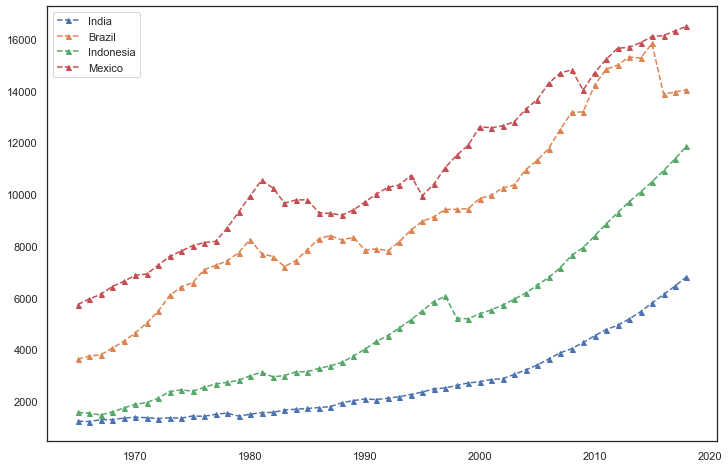

In [123]:
sns.set_theme(style='white')
IND = dv.complete_table('IND')
BRA = dv.complete_table('BRA')
IDN = dv.complete_table('IDN')
MEX = dv.complete_table('MEX')
tot = [IND, BRA, IDN, MEX]
plt.figure(figsize=(12,8))
for country in tot : 
    plt.plot(country['Year'], country['GDPC'], linestyle='dashed', marker='^', markersize=5, label = country['Entity'][0])
    plt.legend()



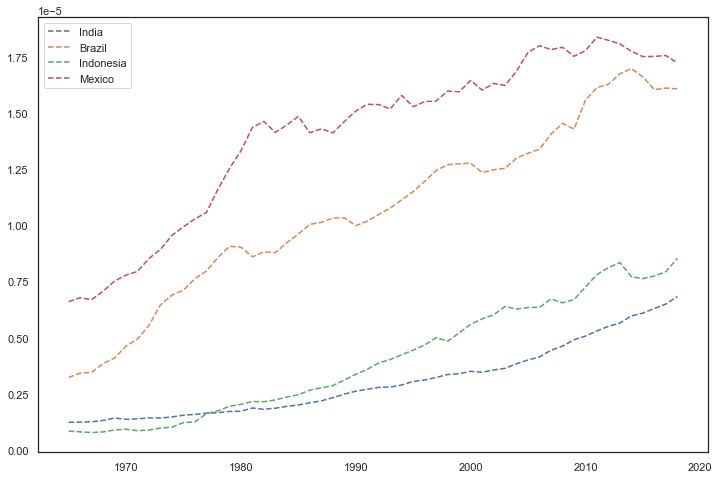

In [127]:
plt.figure(figsize=(12,8))
for country in tot : 
    plt.plot(country['Year'], country['EnergyC'], linestyle='dashed', label = country['Entity'][0])
    plt.legend()

(2.06231, 9.745421847301418e-06, 9.999725341796875, 6.095894834559545e-07, 4.4921069349200714e-07, -7.27253806233504e-08)
finish
(8.333, 3.7243619813022795e-05, 9.999725341796875, 5.620006438156803e-07, 5.298259437769814e-07, 5.731866895413403e-08)
finish
(4.310779999999999, 1.2940864176128977e-05, 9.999725341796875, 3.918380180480198e-07, 1.0088017145957698e-07, 3.877952379210049e-08)
finish
(9.193, 5.085585413855847e-05, 9.999725341796875, 3.1749466783858147e-07, 8.075474700725218e-07, 3.516562459729947e-07)
finish


Text(0.5, 0, 'GDP per capita, k$')

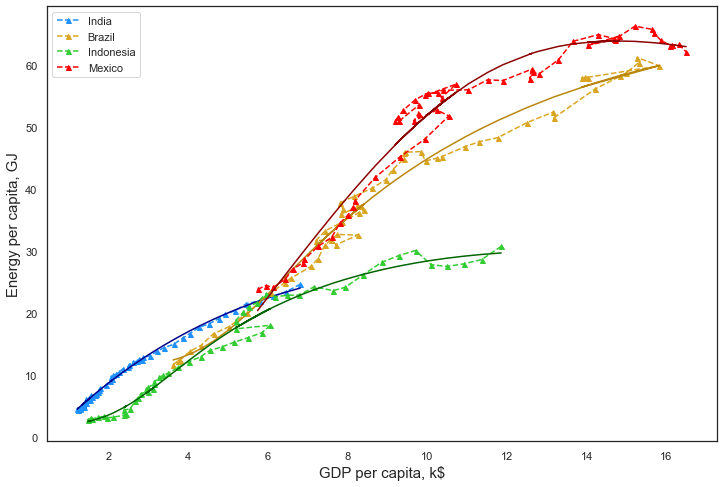

In [128]:
import regressions as reg
plt.figure(figsize=(12,8))
colors = ['dodgerblue', 'goldenrod', 'limegreen', 'red']
colors_d = ['darkblue', 'darkgoldenrod', 'darkgreen', 'darkred']
i=0
for country in tot : 
    energy = country['EnergyC']*3.6
    gdp = country['GDPC']/1000
    plt.plot(gdp, energy*(10**6),  label = country['Entity'][0], linestyle='dashed', marker='^', markersize=5, color=colors[i])
    G_i, E_i, A, a1, a2, a3 = reg.sReg(gdp,energy, maxfev=100000)
    plt.plot(gdp, reg.s_model(gdp,G_i, E_i, A, a1, a2, a3 )*(10**6), color=colors_d[i] )
    print('finish')
    i+=1
    plt.legend()
plt.ylabel('Energy per capita, GJ', fontsize=15)
plt.xlabel('GDP per capita, k$', fontsize=15)

Text(0, 0.5, 'MJ/$')

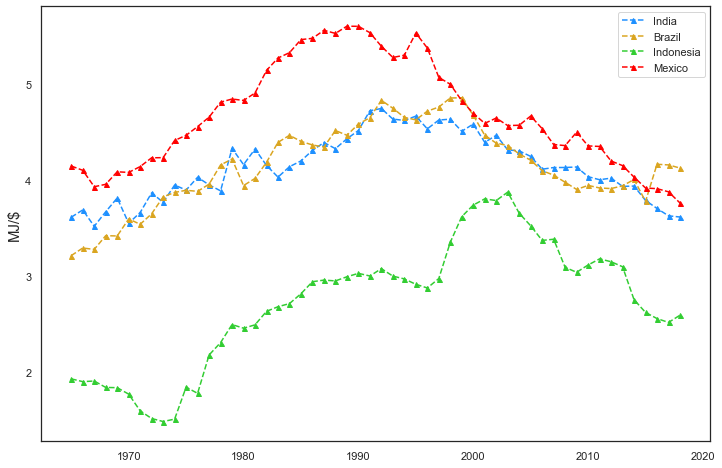

In [126]:
plt.figure(figsize=(12,8))
colors = ['dodgerblue', 'goldenrod', 'limegreen', 'red']
colors_d = ['darkblue', 'darkgoldenrod', 'darkgreen', 'darkred']
i=0
for country in tot : 
    energy = country['EnergyC']
    gdp = country['GDPC']

    plt.plot(country['Year'], (energy/gdp)*3.6*10**9,  label = country['Entity'][0], linestyle='dashed', marker='^', markersize=5, color=colors[i])
    i+=1
    plt.legend()

plt.ylabel("MJ/$", fontsize=15)

Text(0.5, 1.0, 'United states')

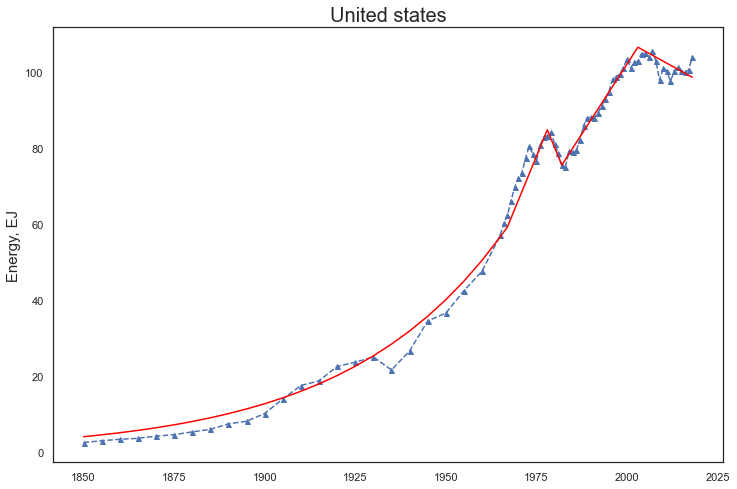

In [23]:
FRA = pd.read_csv('../BDD/final_tables/USA.csv', sep=',')
plt.figure(figsize=(12,8))
plt.plot(FRA['Year'], FRA['Tot PEC (Quadrillion BTU)']*1055.6/10**3, linestyle='dashed', marker='^', markersize=5)
plt.plot(FRA['Year'], FRA['Energy(PJ)-Time(Year)']/10**3, color='red')
plt.ylabel('Energy, EJ', fontsize=15)
plt.title('United states', fontsize=20)

In [22]:
FRA.head()

,Year,GDP per capita,Entity,Code,Population,Tot PEC (Quadrillion BTU),Primary energy (TWh),Energy(PJ)-Time(Year),GDP(2011$)-Time(year),Energy(PJ)-GDP(10e13$),EI(PJ/$)-Time(year)
0,1850,3631.82,United States,USA,24136292,2.357,635.556770,4022.120429,1.164564e+11,1360.409525,2.752994e-08
1,1855,4161.49,United States,USA,27910664,2.810,757.706629,4512.075828,1.359811e+11,1925.769228,2.581495e-08
2,1860,4401.89,United States,USA,31967054,3.162,852.622192,5061.715240,1.587794e+11,2411.053547,2.409996e-08
3,1865,4637.16,United States,USA,36297288,3.409,919.224875,5678.309086,1.853999e+11,2953.907407,2.238496e-08
4,1870,4803.00,United States,USA,40899168,3.952,1065.642917,6370.013434,2.164836e+11,3504.423699,2.066997e-08


(4.64, 4.585070146230621e-09, 9.999725341796875, 4.633393485091858e-11, 9.590873542483819e-11, 3.630007864207441e-11)
finish
(5.883, 1.3186644423870831e-08, 9.999725341796875, -6.811615761573932e-11, 2.2011869947205224e-11, 1.6792125161483648e-10)
finish
(2.77137, 2.658784534433163e-10, 9.999725341796875, 3.757451118643691e-12, 1.0331592388344266e-10, 7.5757053620839e-11)
finish
(11.14977, 1.9940896754412958e-08, 9.999725341796875, 3.98339155969325e-11, 1.2734033600696394e-10, 1.5152408670562325e-10)
finish


Text(0.5, 0, 'GDP per capita, k$')

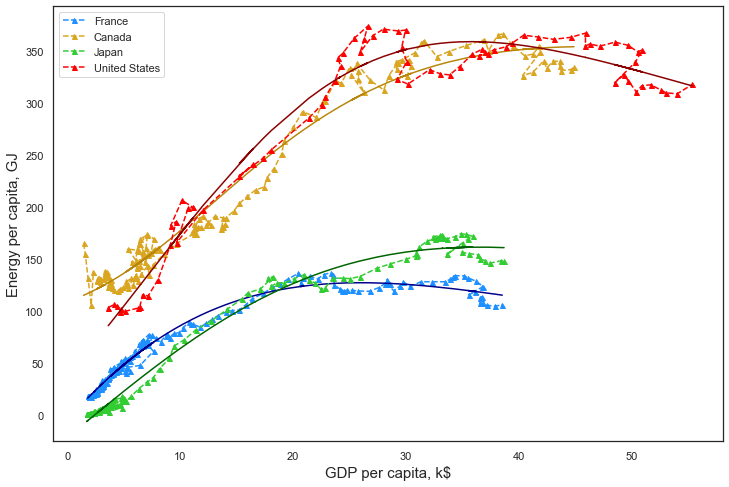

In [121]:
import regressions as reg
plt.figure(figsize=(12,8))
tot = [FRA, CAN, JPN, USA]
colors = ['dodgerblue', 'goldenrod', 'limegreen', 'red']
colors_d = ['darkblue', 'darkgoldenrod', 'darkgreen', 'darkred']
i=0
for country in tot : 
    
    energy = (country['Primary energy (PJ)']/country['Population'])/10**4
    gdp = country['GDP per capita']/1000
    Dy = [np.random.normal(0.003, 0.00002) for i in range(len(gdp))]
    plt.plot(gdp, energy*10**10,  label = country['Entity'][0], linestyle='dashed', marker='^', markersize=5, color=colors[i])
    G_i, E_i, A, a1, a2, a3 = reg.sReg(gdp,energy, maxfev=100000000, Dy=Dy)
    plt.plot(gdp, 10**10*reg.s_model(gdp,G_i, E_i, A, a1, a2, a3 ), color=colors_d[i] )
    print('finish')
    i+=1
    plt.legend()
plt.ylabel('Energy per capita, GJ', fontsize=15)
plt.xlabel('GDP per capita, k$', fontsize=15)

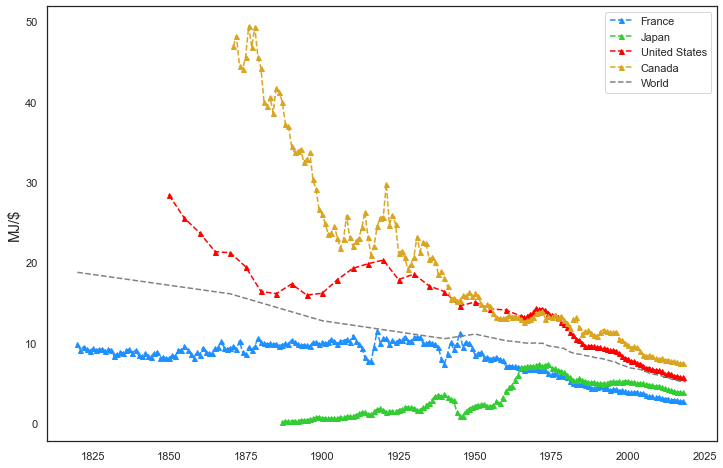

In [145]:
plt.figure(figsize=(12,8))
tot = [FRA, JPN, USA]
colors = ['dodgerblue', 'limegreen', 'red', 'goldenrod']
colors_d = ['darkblue', 'darkgreen', 'darkred', 'darkgoldenrod']
i=0
for country in tot : 
    year = country['Year']
    energy = (country['Primary energy (PJ)']/country['Population'])
    gdp = country['GDP per capita']
    intensity = energy/gdp*10**9
    plt.plot(year, intensity , label = country['Entity'][0], linestyle='dashed', marker='^', markersize=5, color=colors[i])
    i+=1
    plt.legend()
plt.ylabel('MJ/$', fontsize=15)
country = CAN
year = country['Year'][6:]
energy = (country['Primary energy (PJ)']/country['Population'])
gdp = country['GDP per capita']
intensity = energy/gdp*10**9
plt.plot(year, intensity[6:] , label = country['Entity'][0], linestyle='dashed', marker='^', markersize=5, color=colors[i])
plt.legend()
country = pd.read_csv('../BDD/final_tables/OWID_WRL.csv')
year = country['Year']
energy = country['Primary energy (TWh)']
gdp = country['GDP']
intensity = energy/gdp*10**9*3.6
plt.plot(year, intensity, linestyle='dashed', color='grey', label='World')
plt.legend()

In [92]:
country=USA
Dy = [np.random.normal(0.0003, 0.0002) for i in range(len(gdp))]
energy = (country['Primary energy (PJ)']/country['Population'])/10**4
gdp = country['GDP per capita']/1000
i=0
plt.plot(gdp, energy*10**6,  label = country['Entity'][0], linestyle='dashed', marker='^', markersize=5, color=colors[i])
G_i, E_i, A, a1, a2, a3 = reg.sReg(gdp,energy, maxfev=1000,Dy=Dy )
plt.plot(gdp, 10**6*reg.s_model(gdp,G_i, E_i, A, a1, a2, a3 ), color=colors_d[i] )


(11.14977, 1.9940896754412958e-08, 9.999725341796875, 3.98339155969325e-11, 1.2734033600696394e-10, 1.5152408670562325e-10)


OverflowError: math range error